# EDA 06 - Data Wrangling ( Normalization , Discretization and Feature Encoding)

### 1. Necessary Imports 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


### 2. Loading Dataset

In [2]:
data = pd.read_csv("Finance.csv") 

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### 3. Discretization

#### a) Discretization of Age 

In [6]:
data['age']  = np.where((data['age'] <20) ,'Teenager',
                                np.where((data['age'] >=20) & (data['age'] <=30),'Adult',
                               np.where((data['age']>30) & (data['age'] <=50),'Middle Aged',
                                       'old')))

In [10]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,old,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,Middle Aged,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,Middle Aged,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,Middle Aged,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,Middle Aged,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### b) Discretization of balance 

In [24]:
data['balance'].value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [25]:
data['balance'].mean()

1362.2720576850766

In [26]:
data['balance'].max()

102127

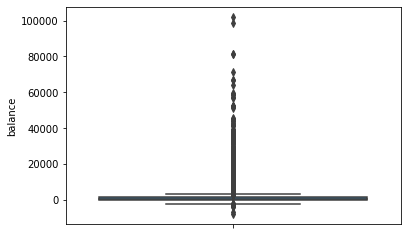

In [27]:
sns.boxplot( y = 'balance', data = data)

In [28]:
(data['balance']<0).sum()

3766

In [29]:
((data['balance']>0) & (data['balance']<1200)).sum()

24968

In [30]:
((data['balance']>1200) & (data['balance']<1500)).sum()

2057

In [31]:
((data['balance']>1500) & (data['balance']<30000)).sum()

10843

In [32]:
((data['balance']>30000).sum())

52

In [33]:
data['balance']  = np.where((data['balance'] <0) ,'Negative',
                               np.where((data['balance'] >=0) & (data['balance'] <=1200),'Low',
                               np.where((data['balance']>1200) & (data['balance'] <=1500),'Average',
                               np.where((data['balance']>1500) & (data['balance'] <=30000),'High',
                                       'very high'))))

In [34]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,old,management,married,tertiary,no,High,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [35]:
data['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [36]:
data['day'].mean()

15.80641879188693

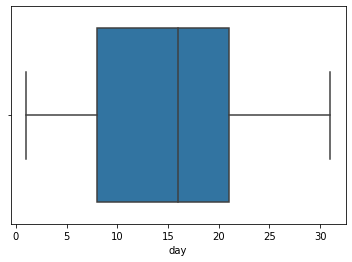

In [37]:
sns.boxplot(x='day',data=data)

In [38]:
data['day'].max()

31

In [39]:
data.dtypes

age          object
job          object
marital      object
education    object
default      object
balance      object
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [40]:
data['day']  = np.where((data['day'] <5) ,'Below5',
                               np.where((data['day'] >=5) & (data['day'] <=10),'Between5-10',
                               np.where((data['day']>10) & (data['day'] <=20),'Between 10&20',
                               'Above 20')))

In [41]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,may,261,1,-1,0,unknown,no
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,151,1,-1,0,unknown,no
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,may,76,1,-1,0,unknown,no
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,may,92,1,-1,0,unknown,no
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,may,198,1,-1,0,unknown,no


In [42]:
data['day'].value_counts()

Between 10&20    18389
Above 20         13097
Between5-10       9586
Below5            4139
Name: day, dtype: int64

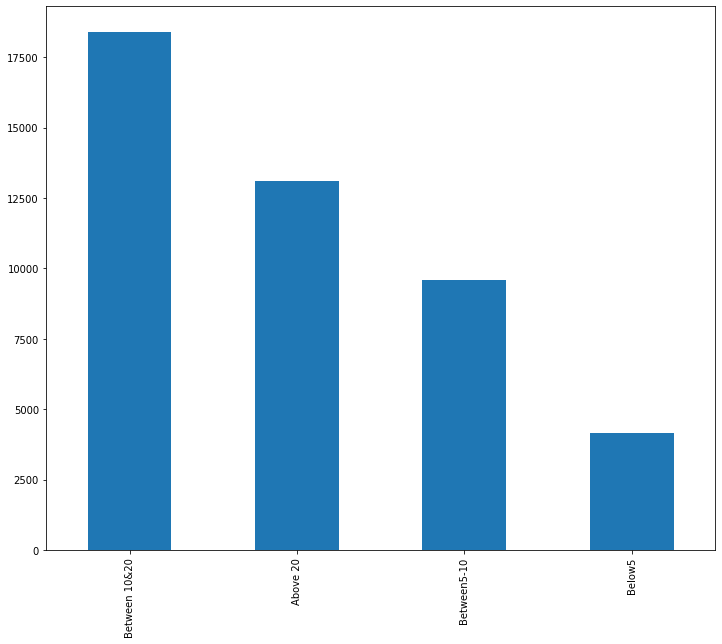

In [43]:
data['day'].value_counts().plot(kind='bar', figsize=(12,10))


In [44]:
tab=pd.crosstab(data['day'],data['y'])

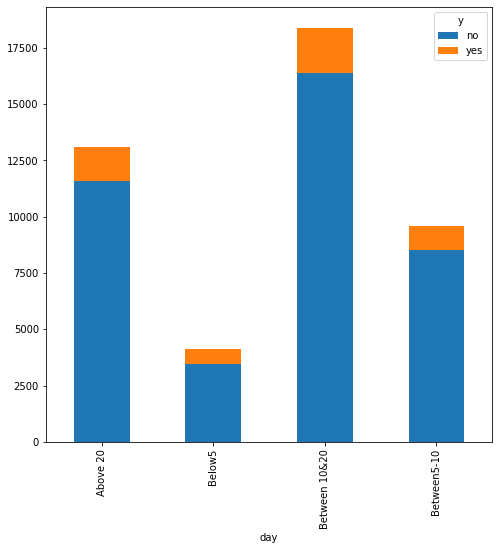

In [45]:
tab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

### 4.) Normalization 

#### a)  Normalization : Duration Column 

In [218]:
data['duration'].value_counts().unique()

array([188, 184, 177, 175, 174, 173, 170, 169, 168, 166, 165, 164, 163,
       162, 161, 160, 159, 157, 156, 155, 154, 153, 152, 151, 150, 149,
       148, 147, 146, 145, 144, 142, 141, 140, 139, 138, 137, 136, 135,
       134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122,
       121, 120, 119, 118, 117, 116, 115, 113, 112, 111, 110, 108, 107,
       106, 105, 104, 103, 101, 100,  99,  97,  96,  95,  94,  93,  92,
        91,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,
        78,  77,  76,  75,  73,  72,  71,  70,  68,  67,  66,  65,  64,
        63,  62,  61,  60,  58,  57,  56,  55,  54,  53,  52,  50,  49,
        48,  47,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,
        34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,
        21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,
         8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

In [220]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration1
0,old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,may,261,1,-1,0,unknown,no,0.05
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,151,1,-1,0,unknown,no,0.03
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,may,76,1,-1,0,unknown,no,0.02
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,may,92,1,-1,0,unknown,no,0.02
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,may,198,1,-1,0,unknown,no,0.04
5,Middle Aged,management,married,tertiary,no,Low,yes,no,unknown,Between5-10,may,139,1,-1,0,unknown,no,0.03
6,Adult,management,single,tertiary,no,Low,yes,yes,unknown,Between5-10,may,217,1,-1,0,unknown,no,0.04
7,Middle Aged,entrepreneur,divorced,tertiary,yes,Low,yes,no,unknown,Between5-10,may,380,1,-1,0,unknown,no,0.08
8,old,retired,married,primary,no,Low,yes,no,unknown,Between5-10,may,50,1,-1,0,unknown,no,0.01
9,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,55,1,-1,0,unknown,no,0.01


#### 1. Min-Max Normalization  

In [46]:
data['duration2']  = (data.duration - data.duration.min()) / (data.duration.max() - data.duration.min())

In [47]:
data.duration2=data.duration2.round(2)


In [48]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration2
0,old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,may,261,1,-1,0,unknown,no,0.05
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,151,1,-1,0,unknown,no,0.03
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,may,76,1,-1,0,unknown,no,0.02
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,may,92,1,-1,0,unknown,no,0.02
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,may,198,1,-1,0,unknown,no,0.04


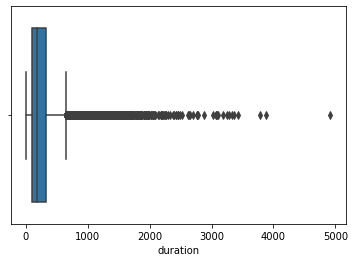

In [49]:
sns.boxplot(x='duration',data=data)

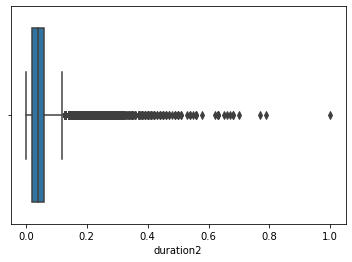

In [50]:
sns.boxplot(x='duration2',data=data)

using MinMaxScaler function 

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['durationMinMAx']=scaler.fit_transform(data[['duration']])

In [95]:
pd.set_option('display.max_columns', 30)

In [96]:
data.head()

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital2,balance2,loan_no,loan_yes,durationMinMAx
0,old,4,married,tertiary,no,High,yes,unknown,Between5-10,8,0.01,1,-1,0,unknown,no,0,3,1,0,0.052907
1,Middle Aged,9,single,secondary,no,Low,yes,unknown,Between5-10,8,-0.42,1,-1,0,unknown,no,1,1,1,0,0.030382
2,Middle Aged,2,married,secondary,no,Low,yes,unknown,Between5-10,8,-0.71,1,-1,0,unknown,no,0,1,0,1,0.015191
3,Middle Aged,1,married,unknown,no,High,yes,unknown,Between5-10,8,-0.65,1,-1,0,unknown,no,0,3,1,0,0.018334
4,Middle Aged,11,single,unknown,no,Low,no,unknown,Between5-10,8,-0.23,1,-1,0,unknown,no,1,1,1,0,0.040335


#### 2. Z-Score Normalization

In [51]:
data['duration3'] = (data.duration - data.duration.mean()) / data.duration.std()
data.duration3=data.duration3.round(2)

In [52]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration2,duration3
0,old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,may,261,1,-1,0,unknown,no,0.05,0.01
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,151,1,-1,0,unknown,no,0.03,-0.42
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,may,76,1,-1,0,unknown,no,0.02,-0.71
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,may,92,1,-1,0,unknown,no,0.02,-0.65
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,may,198,1,-1,0,unknown,no,0.04,-0.23


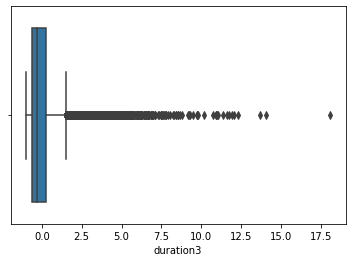

In [53]:
sns.boxplot(x='duration3',data=data)

####  3. Decimal Scaling

In [54]:
maxi=data.duration.max()

In [55]:
maxi

4918

In [56]:
len(str(maxi))

4

In [57]:
pow(10,4)

10000

In [58]:
data['duration4']=data.duration / pow(10,len(str(data.duration.max())))

In [59]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration2,duration3,duration4
0,old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,may,261,1,-1,0,unknown,no,0.05,0.01,0.0261
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,151,1,-1,0,unknown,no,0.03,-0.42,0.0151
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,may,76,1,-1,0,unknown,no,0.02,-0.71,0.0076
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,may,92,1,-1,0,unknown,no,0.02,-0.65,0.0092
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,may,198,1,-1,0,unknown,no,0.04,-0.23,0.0198


#### Choosing one Normalization and dropping all others 

In [60]:
data['duration'] = (data.duration - data.duration.mean()) / data.duration.std()
data.duration=data.duration.round(2)

In [61]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration2,duration3,duration4
0,old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,may,0.01,1,-1,0,unknown,no,0.05,0.01,0.0261
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,-0.42,1,-1,0,unknown,no,0.03,-0.42,0.0151
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,may,-0.71,1,-1,0,unknown,no,0.02,-0.71,0.0076
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,may,-0.65,1,-1,0,unknown,no,0.02,-0.65,0.0092
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,may,-0.23,1,-1,0,unknown,no,0.04,-0.23,0.0198


In [63]:
data = data.drop(['duration2', 'duration3','duration4'],axis=1)

In [239]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,may,0.01,1,-1,0,unknown,no
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,-0.42,1,-1,0,unknown,no
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,may,-0.71,1,-1,0,unknown,no
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,may,-0.65,1,-1,0,unknown,no
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,may,-0.23,1,-1,0,unknown,no


### 5. Feature Encoding

#### a) Mannual Encoding

In [65]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [66]:
data['marital2'] = data['marital'].replace(['married','single','divorced'],[0,1,2])

In [67]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital2
0,old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,may,0.01,1,-1,0,unknown,no,0
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,-0.42,1,-1,0,unknown,no,1
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,may,-0.71,1,-1,0,unknown,no,0
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,may,-0.65,1,-1,0,unknown,no,0
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,may,-0.23,1,-1,0,unknown,no,1


#### b) Encoding Ordinal Attributes

In [69]:
data['balance'].value_counts()

Low          28487
High         10843
Negative      3766
Average       2063
very high       52
Name: balance, dtype: int64

In [70]:
data['balance2'] = data['balance'].replace(['Negative','Low','Average','High','very high'],[0,1,2,3,4])

In [71]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital2,balance2
0,old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,may,0.01,1,-1,0,unknown,no,0,3
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,may,-0.42,1,-1,0,unknown,no,1,1
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,may,-0.71,1,-1,0,unknown,no,0,1
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,may,-0.65,1,-1,0,unknown,no,0,3
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,may,-0.23,1,-1,0,unknown,no,1,1


#### c) Label Encoding

In [72]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [73]:
from numpy import array
from sklearn.preprocessing import LabelEncoder

In [74]:
label_encoder = LabelEncoder()
data.month = label_encoder.fit_transform(data.month)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital2,balance2
0,old,management,married,tertiary,no,High,yes,no,unknown,Between5-10,8,0.01,1,-1,0,unknown,no,0,3
1,Middle Aged,technician,single,secondary,no,Low,yes,no,unknown,Between5-10,8,-0.42,1,-1,0,unknown,no,1,1
2,Middle Aged,entrepreneur,married,secondary,no,Low,yes,yes,unknown,Between5-10,8,-0.71,1,-1,0,unknown,no,0,1
3,Middle Aged,blue-collar,married,unknown,no,High,yes,no,unknown,Between5-10,8,-0.65,1,-1,0,unknown,no,0,3
4,Middle Aged,unknown,single,unknown,no,Low,no,no,unknown,Between5-10,8,-0.23,1,-1,0,unknown,no,1,1


In [76]:
data['month'].value_counts()

8     13766
5      6895
1      6247
6      5341
9      3970
0      2932
3      2649
4      1403
10      738
11      579
7       477
2       214
Name: month, dtype: int64

In [75]:
data['month'].value_counts()

8     13766
5      6895
1      6247
6      5341
9      3970
0      2932
3      2649
4      1403
10      738
11      579
7       477
2       214
Name: month, dtype: int64

In [77]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [78]:
label_encoder = LabelEncoder()
data.job = label_encoder.fit_transform(data.job)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital2,balance2
0,old,4,married,tertiary,no,High,yes,no,unknown,Between5-10,8,0.01,1,-1,0,unknown,no,0,3
1,Middle Aged,9,single,secondary,no,Low,yes,no,unknown,Between5-10,8,-0.42,1,-1,0,unknown,no,1,1
2,Middle Aged,2,married,secondary,no,Low,yes,yes,unknown,Between5-10,8,-0.71,1,-1,0,unknown,no,0,1
3,Middle Aged,1,married,unknown,no,High,yes,no,unknown,Between5-10,8,-0.65,1,-1,0,unknown,no,0,3
4,Middle Aged,11,single,unknown,no,Low,no,no,unknown,Between5-10,8,-0.23,1,-1,0,unknown,no,1,1


### 6. ONE HOT ENCODING

In [260]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [265]:
data.dtypes

age            object
job             int64
marital        object
education      object
default        object
balance        object
housing        object
loan         category
contact        object
day            object
month           int64
duration      float64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
marital2        int64
balance2        int64
dtype: object

In [79]:
data['loan'] = pd.Categorical(data['loan'])

In [80]:
    dfDummies = pd.get_dummies(data['loan'], prefix = 'loan')

In [81]:
dfDummies

,loan_no,loan_yes
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,1,0


In [82]:
data = pd.concat([data, dfDummies], axis=1)

In [83]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,marital2,balance2,loan_no,loan_yes
0,old,4,married,tertiary,no,High,yes,no,unknown,Between5-10,...,0.01,1,-1,0,unknown,no,0,3,1,0
1,Middle Aged,9,single,secondary,no,Low,yes,no,unknown,Between5-10,...,-0.42,1,-1,0,unknown,no,1,1,1,0
2,Middle Aged,2,married,secondary,no,Low,yes,yes,unknown,Between5-10,...,-0.71,1,-1,0,unknown,no,0,1,0,1
3,Middle Aged,1,married,unknown,no,High,yes,no,unknown,Between5-10,...,-0.65,1,-1,0,unknown,no,0,3,1,0
4,Middle Aged,11,single,unknown,no,Low,no,no,unknown,Between5-10,...,-0.23,1,-1,0,unknown,no,1,1,1,0


In [84]:
del data['loan']

In [85]:
data.head()

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital2,balance2,loan_no,loan_yes
0,old,4,married,tertiary,no,High,yes,unknown,Between5-10,8,0.01,1,-1,0,unknown,no,0,3,1,0
1,Middle Aged,9,single,secondary,no,Low,yes,unknown,Between5-10,8,-0.42,1,-1,0,unknown,no,1,1,1,0
2,Middle Aged,2,married,secondary,no,Low,yes,unknown,Between5-10,8,-0.71,1,-1,0,unknown,no,0,1,0,1
3,Middle Aged,1,married,unknown,no,High,yes,unknown,Between5-10,8,-0.65,1,-1,0,unknown,no,0,3,1,0
4,Middle Aged,11,single,unknown,no,Low,no,unknown,Between5-10,8,-0.23,1,-1,0,unknown,no,1,1,1,0
